In [3]:
# Importing required libraries

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as lb

%matplotlib inline

# Importing the dataset that contains the data related to cars


In [37]:
df = pd.read_csv("car-details.csv")
df.head(4)

# Replacing the null values with 0
df.replace(np.nan, 0)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82
394,44.0,4,97.0,52.0,2130,24.6,82
395,32.0,4,135.0,84.0,2295,11.6,82
396,28.0,4,120.0,79.0,2625,18.6,82


# Describing the data

In [38]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year
count,398.000000,398.000000,398.000000,396.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.189394,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.402030,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


# Checking graphs of various independent variables

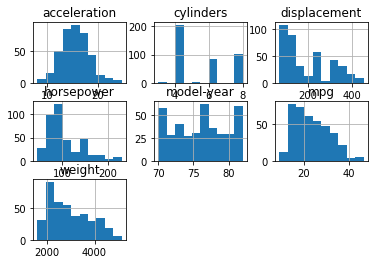

In [40]:
df.hist()
plt.show()

# Finding the relationship between various independent variables and  Dependent variables


<function matplotlib.pyplot.show(*args, **kw)>

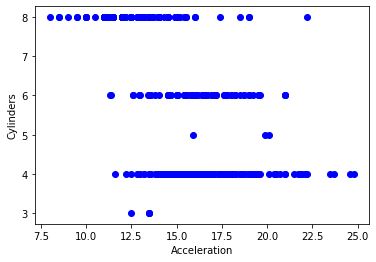

In [41]:
plt.scatter(df.acceleration, df.cylinders, color="blue")
plt.xlabel("Acceleration")
plt.ylabel("Cylinders")
plt.show

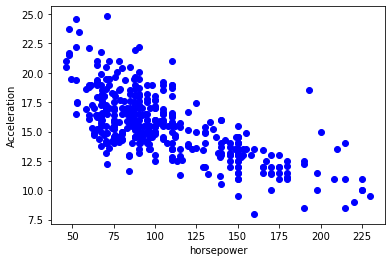

In [87]:
plt.scatter(df.horsepower, df.acceleration, color="blue")
plt.xlabel("horsepower")
plt.ylabel("Acceleration")
plt.show()

# Splitting the data into test and train data

In [64]:
df['horsepower'] = df['horsepower'].apply(lambda x: (x*100)/100)
#Splitting the data into test and train
msk = np.random.rand(len(df)) <0.8
df.fillna(0)
train = df[msk]
test = df[~msk]
print(train['horsepower'].describe())

count    315.000000
mean     104.307937
std       37.550693
min       46.000000
25%       76.000000
50%       95.000000
75%      121.000000
max      230.000000
Name: horsepower, dtype: float64


# Training the model using horsepower and acceleration

In [72]:
#Modeling data


from sklearn import linear_model

model = linear_model.LinearRegression()
train_x = np.asanyarray(train[['horsepower']])
train_y = np.asanyarray(train[['acceleration']])
train_x = np.nan_to_num(train_x)
np.nan_to_num(train_y)
#train_x.fillna(train_x.mean())
#train_y.fillna(train_y.mean())
model.fit(train_x, train_y)

print("Coefficient : ",model.coef_)
print("Intercept : ",model.intercept_)

Coefficient :  [[-0.04727235]]
Intercept :  [20.46696438]


# Compare the fitted line with the dataset - 

fitted line formula -

------------------

y^ = ø0 + ø1x

-----------------

where ø0 and ø1 is called intercept and coefficient respectively. 

While training a model, the algorithm finds the most suitable value of coefficient and intercept

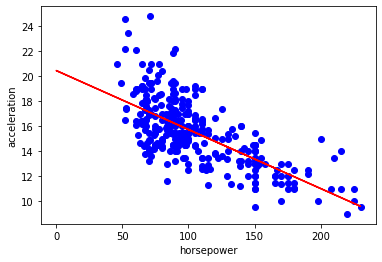

In [73]:
# Showing the fit line over the data

plt.scatter(train.horsepower, train.acceleration, color="blue")
plt.plot(train_x, model.coef_[0][0]*train_x + model.intercept_[0], '-r')
plt.xlabel("horsepower")
plt.ylabel("acceleration")
plt.show()

# Predicing the values using model created with independent variable - horsepower

In [112]:
# Evaluation - by testing with the test data

from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['horsepower']])
test_y = np.asanyarray(test[['acceleration']])

y_hat = model.predict(test_x)

#for actual, predicted in zip(test_y, y_hat):
#    print("Actual value : {} - Predicted value : {} - Difference : {}".format(actual, predicted, abs(actual-predicted)))

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

Mean absolute error: 1.75
R2-score: -0.39


In [88]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model-year'],
      dtype='object')

# Checking the relationship between remaining independent variables and dependent variable

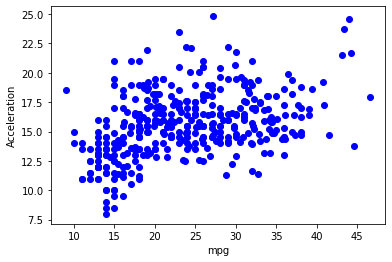

In [89]:
# Finding relationship with other independent variables

plt.scatter(df.mpg, df.acceleration, color="blue")
plt.xlabel("mpg")
plt.ylabel("Acceleration")
plt.show()

# Result - There is not linear relationship between mpg and acceleration.

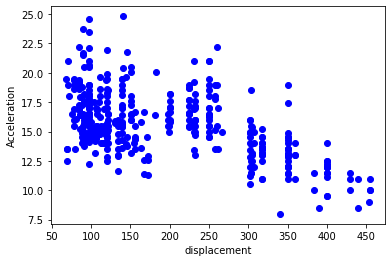

In [91]:
# Finding relationship with other independent variables

plt.scatter(df.displacement, df.acceleration, color="blue")
plt.xlabel("displacement")
plt.ylabel("Acceleration")
plt.show()

# Result - There is no linear relationship between displacement and acceleration. 
# from the graph we can see there is a curve, therefore it is a non-linear relationship

# Even its not linear, we can still use this variable to train our model to see if it can improve its accuracy

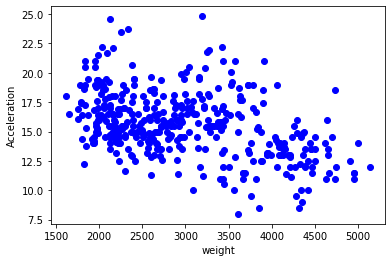

In [92]:
# Finding relationship with other independent variables

plt.scatter(df.weight, df.acceleration, color="blue")
plt.xlabel("weight")
plt.ylabel("Acceleration")
plt.show()

# Result - There is no linear relationship between weight and acceleration. 
# from the graph we can see there is a curve, therefore it is a non-linear relationship

# Even its not linear, we can still use this variable to train our model to see if it can improve its accuracy

# Training models with two independent variables : mpg and weight

comparing the fitted line with datasets

In [103]:
# Creating model using mpg 

train_x = np.asanyarray(train[['mpg']])
train_y = np.asanyarray(train[['acceleration']])
train_x = np.nan_to_num(train_x)

from sklearn import linear_model

model_mpg = linear_model.LinearRegression()
model_mpg.fit(train_x, train_y)

print("Model trained")
print("Coefficient : {}".format(model_mpg.coef_))
print("intercept_ : {}".format(model_mpg.intercept_))

Model trained
Coefficient : [[0.13278957]]
intercept_ : [12.45995843]


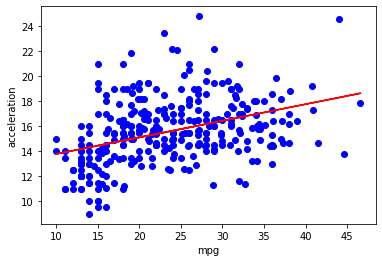

In [107]:
# Visually checking the model
plt.scatter(train_x, train_y, color="blue")
plt.plot(train_x, model_mpg.coef_*train_x+model_mpg.intercept_, '-r')
plt.xlabel("mpg")
plt.ylabel("acceleration")
plt.show()

In [110]:
# Creating model using weight

train_x = np.asanyarray(train[['weight']])
train_y = np.asanyarray(train[['acceleration']])
train_x = np.nan_to_num(train_x)

model_weight = linear_model.LinearRegression()
model_weight.fit(train_x, train_y)

print("Model trained on weight")
print("Coefficient : {}".format(model_weight.coef_))
print("Intercept : {}".format(model_weight.intercept_))

Model trained on weight
Coefficient : [[-0.00129615]]
Intercept : [19.40826748]


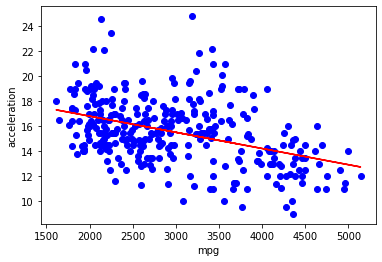

In [111]:
# Visually checking the model
plt.scatter(train_x, train_y, color="blue")
plt.plot(train_x, model_weight.coef_*train_x+model_weight.intercept_, '-r')
plt.xlabel("mpg")
plt.ylabel("acceleration")
plt.show()

# Evaluating the accuracy of various models - 

In [115]:
# Comparing the mean absolute error of horsepower, mpg and weight

y_hat = model.predict(test_x)
y_hat_mpg = model_mpg.predict(test_x)
y_hat_weight = model_weight.predict(test_x)

print("Model based on Horsepower")
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("R2-score: %.2f" % r2_score(y_hat , test_y) )
print("-------------------------")
print("Model based on mpg")
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat_mpg - test_y)))
print("R2-score: %.2f" % r2_score(y_hat_mpg, test_y))
print("-------------------------")
print("Model based on weight")
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat_weight - test_y)))
print("R2-score: %.2f" % r2_score(y_hat_weight, test_y))

Model based on Horsepower
Mean absolute error: 1.75
R2-score: -0.39
-------------------------
Model based on mpg
Mean absolute error: 10.98
R2-score: -4.85
-------------------------
Model based on weight
Mean absolute error: 4.14
R2-score: -8108.57


Hence, Horsepower has most influence on the Acceleration of the car from the dataset. 